##***Classifying Fruits and Vegetables Using Image Classification***
---
---
### The given dataset contains images of a variety of fruits and vegetables, offering a rich source for developing and testing image recognition algorithms. The food items are categorized as follows:

- Fruits:
Banana, Apple, Pear, Grapes, Orange, Kiwi, Watermelon, Pomegranate, Pineapple, Mango

- Vegetables:
Cucumber, Carrot, Capsicum, Onion, Potato, Lemon, Tomato, Radish, Beetroot, Cabbage, Lettuce, Spinach, Soybean, Cauliflower, Bell Pepper, Chilly, Pepper, Turnip, Corn, Sweetcorn, Sweet Potato, Paprika, Jalapeño, Ginger, Garlic, Peas, Eggplant.

### Given this dataset, your task is to create a machine learning model that can classify the images into two main categories: Fruits and Vegetables.

#***Problem Definition***
---
---

- Objective: Binary classification of images into Fruit (0) or Vegetable (1).

  - Input: Image of a fruit or vegetable.

  - Output: Label → Fruit or Vegetable.

#1. Install libraries
---

In [ ]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

import os, json
os.makedirs('/root/.kaggle', exist_ok=True)
with open('kaggle.json') as f:
    kaggle_token = json.load(f)
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle_token, f)
os.chmod('/root/.kaggle/kaggle.json', 600)


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
 99% 1.96G/1.98G [00:16<00:00, 234MB/s]
100% 1.98G/1.98G [00:16<00:00, 126MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("fruit-and-vegetable-image-recognition.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset_folder")


In [ ]:
zip_path = '/content/fruit-and-vegetable-image-recognition.zip'
extract_path = '/content/dataset_folder' # Changed extraction path to a directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

print("Extracted folders:", os.listdir(extract_path))

Extracted folders: ['test', 'validation', 'train']


In [ ]:
print(os.listdir(extract_path))
# Example output: ['train', 'validation', 'test']


['test', 'validation', 'train']


#2. Load dataset
---


In [ ]:
import tensorflow as tf

img_size = (128, 128)
batch_size = 32

train_dir = os.path.join(extract_path, 'train')
val_dir = os.path.join(extract_path, 'validation')
test_dir = os.path.join(extract_path, 'test')

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical'
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical'
)


Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


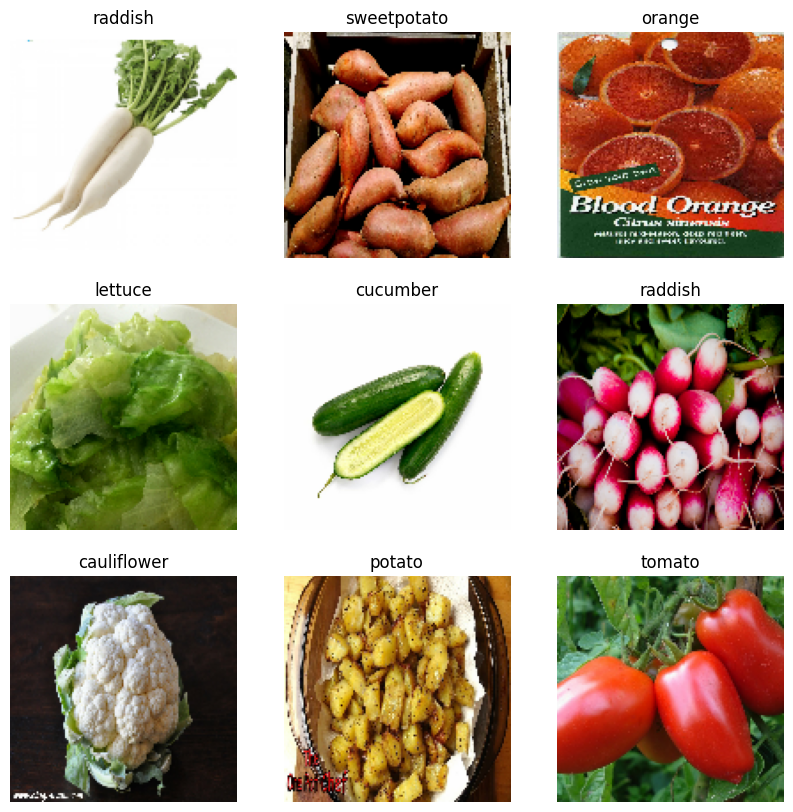

In [ ]:
#-----------Visualize the dataset-------------
import matplotlib.pyplot as plt

class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")
plt.show()


#3.Label Encoding
---

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Get all class folder names from train directory
class_names = sorted(os.listdir(train_dir))

# Initialize label encoder and fit on class names
le = LabelEncoder()
le.fit(class_names)

# Example: encode a class name
print("Class mapping:", dict(zip(class_names, le.transform(class_names))))


Class mapping: {'apple': np.int64(0), 'banana': np.int64(1), 'beetroot': np.int64(2), 'bell pepper': np.int64(3), 'cabbage': np.int64(4), 'capsicum': np.int64(5), 'carrot': np.int64(6), 'cauliflower': np.int64(7), 'chilli pepper': np.int64(8), 'corn': np.int64(9), 'cucumber': np.int64(10), 'eggplant': np.int64(11), 'garlic': np.int64(12), 'ginger': np.int64(13), 'grapes': np.int64(14), 'jalepeno': np.int64(15), 'kiwi': np.int64(16), 'lemon': np.int64(17), 'lettuce': np.int64(18), 'mango': np.int64(19), 'onion': np.int64(20), 'orange': np.int64(21), 'paprika': np.int64(22), 'pear': np.int64(23), 'peas': np.int64(24), 'pineapple': np.int64(25), 'pomegranate': np.int64(26), 'potato': np.int64(27), 'raddish': np.int64(28), 'soy beans': np.int64(29), 'spinach': np.int64(30), 'sweetcorn': np.int64(31), 'sweetpotato': np.int64(32), 'tomato': np.int64(33), 'turnip': np.int64(34), 'watermelon': np.int64(35)}


#4.Data Pre-processing
---

In [ ]:
import tensorflow as tf

img_size = (128, 128)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'  # One-hot encoding for multi-class; use 'binary' for binary classification
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)


Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


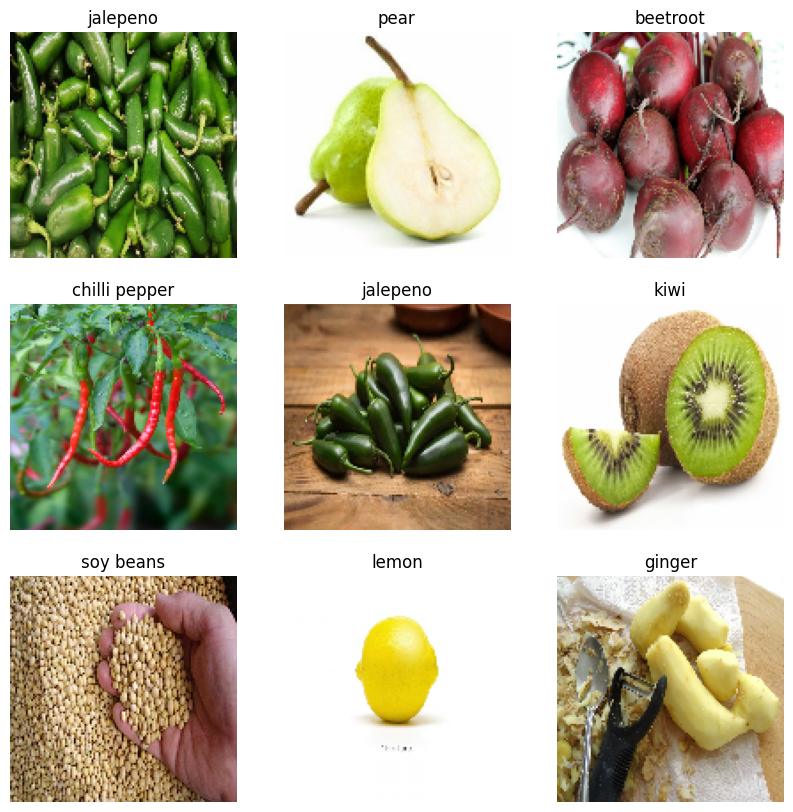

In [ ]:
#-----------Visualize the dataset-------------
import matplotlib.pyplot as plt

class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")
plt.show()


#Normalize pixel
---

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

train_ds = train_ds.map(preprocess).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.map(preprocess).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.map(preprocess).prefetch(buffer_size=AUTOTUNE)

#3. Compile the Model
---

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=img_size + (3,)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # For multi-class classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


#4.Train the Model
---

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # Adjust epochs as needed
)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 640ms/step - accuracy: 0.0210 - loss: 3.5841 - val_accuracy: 0.0256 - val_loss: 3.5836
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 563ms/step - accuracy: 0.0306 - loss: 3.5821 - val_accuracy: 0.0256 - val_loss: 3.5838
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 613ms/step - accuracy: 0.0310 - loss: 3.5811 - val_accuracy: 0.0256 - val_loss: 3.5843
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 604ms/step - accuracy: 0.0358 - loss: 3.5795 - val_accuracy: 0.0256 - val_loss: 3.5850
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 615ms/step - accuracy: 0.0319 - loss: 3.5789 - val_accuracy: 0.0256 - val_loss: 3.5856
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 565ms/step - accuracy: 0.0351 - loss: 3.5784 - val_accuracy: 0.0256 - val_loss: 3.5864
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 595ms/step - accuracy: 0.0334 - loss: 3.5787 - val_accuracy: 0.0256 - val_loss: 3.5871
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 603ms/step - accuracy: 0.0353 - loss: 3.5785 - val_accu

#5.Evaluate the model
---

In [ ]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 588ms/step - accuracy: 0.0209 - loss: 3.5913


[3.587676763534546, 0.027855154126882553]

#$Conclusion$

---
- Model accuracy is around 2.78% which is very low
- Go for Transfer learning using VGG16


# 6. Build the Model with Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

# Load the VGG16 model pre-trained on ImageNet, without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=img_size + (3,))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(class_names), activation='softmax')(x)  # Output layer for our classes

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#7. Compile the Model (Transfer Learning)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_1 (Cast)                   │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,768,036 (60.15 MB)

 Trainable params: 1,053,348 (4.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

#8. Train the Model (Transfer Learning - Head Layers)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # Start with training the new layers for a few epochs
)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 648ms/step - accuracy: 0.1504 - loss: 3.3306 - val_accuracy: 0.6638 - val_loss: 1.3203
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 609ms/step - accuracy: 0.5831 - loss: 1.5857 - val_accuracy: 0.8803 - val_loss: 0.5853
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 647ms/step - accuracy: 0.7625 - loss: 0.9207 - val_accuracy: 0.9316 - val_loss: 0.3834
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 641ms/step - accuracy: 0.8544 - loss: 0.6053 - val_accuracy: 0.9459 - val_loss: 0.2678
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 628ms/step - accuracy: 0.9220 - loss: 0.3952 - val_accuracy: 0.9544 - val_loss: 0.2136
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 562ms/step - accuracy: 0.9578 - loss: 0.2573 - val_accuracy: 0.9573 - val_loss: 0.1810
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 560ms/step - accuracy: 0.9786 - loss: 0.1757 - val_accuracy: 0.9658 - val_loss: 0.1767
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 598ms/step - accuracy: 0.9852 - loss: 0.1370 - val_accu

#9. Fine-tune the Model (Transfer Learning - Fine-tuning)

In [ ]:
# Unfreeze some layers of the base model
# It's common to unfreeze later layers in the base model
for layer in base_model.layers[-4:]: # Example: unfreezing the last 4 layers of VGG16
    layer.trainable = True

# Compile the model with a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_1 (Cast)                   │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,768,036 (60.15 MB)

 Trainable params: 8,132,772 (31.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
# Continue training the model with fine-tuning
fine_tune_epochs = 10 # Adjust the number of fine-tuning epochs
total_epochs = history.epoch[-1] + fine_tune_epochs # Start from where the previous training left off

history_fine_tune = model.fit(
    train_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1], # Start from the epoch we left off
    validation_data=val_ds
)

Epoch 10/19
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 571ms/step - accuracy: 0.9869 - loss: 0.0607 - val_accuracy: 0.9601 - val_loss: 0.1659
Epoch 11/19
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 600ms/step - accuracy: 0.9887 - loss: 0.0395 - val_accuracy: 0.9544 - val_loss: 0.1494
Epoch 12/19
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 606ms/step - accuracy: 0.9894 - loss: 0.0290 - val_accuracy: 0.9630 - val_loss: 0.1487
Epoch 13/19
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 591ms/step - accuracy: 0.9886 - loss: 0.0311 - val_accuracy: 0.9601 - val_loss: 0.1500
Epoch 14/19
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 601ms/step - accuracy: 0.9891 - loss: 0.0280 - val_accuracy: 0.9601 - val_loss: 0.1521
Epoch 15/19
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 603ms/step - accuracy: 0.9883 - loss: 0.0325 - val_accuracy: 0.9658 - val_loss: 0.1582
Epoch 16/19
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 564ms/step - accuracy: 0.9901 - loss: 0.0237 - val_accuracy: 0.9630 - val_loss: 0.1957
Epoch 17/19
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 596ms/step - accuracy: 0.9899 - loss: 0.0293 - 

#10. Evaluate the Model (After Fine-tuning)

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 790ms/step - accuracy: 0.9642 - loss: 0.1443
Test Loss: 0.16035352647304535
Test Accuracy: 0.9637883305549622


#$Conclusion:$
The test accuracy after fine-tuning is approximately 96.38%, which is a significant improvement compared to the initial model's accuracy of around 2.78%. This indicates that transfer learning and fine-tuning were effective in improving the model's performance on this image classification task.

#11. Test the Model with a Single Image

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Function to load and preprocess a single image
def load_and_preprocess_image(img_path, img_size):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array = img_array / 255.0  # Normalize the image
    return img_array

    img_path = '/content/apple_158989157.jpg' # Replace with a valid image path
    # --------------------------------------------------------------------

    preprocessed_img = load_and_preprocess_image(img_path, img_size)

    # Get the class names from the training directory
    class_names = sorted(os.listdir(train_dir))


    # Make a prediction
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_class_index]

    print(f"The predicted class is: {predicted_class_name}")

except FileNotFoundError:
    print(f"Error: The image file was not found at {img_path}. Please upload an image and update the img_path variable.")
except Exception as e:
    print(f"An error occurred: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The predicted class is: apple


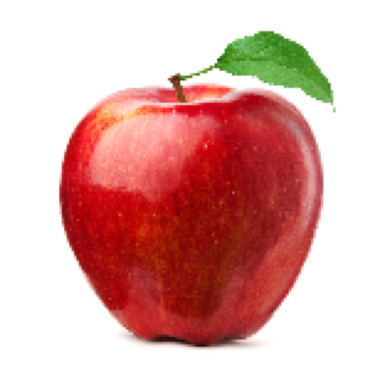

In [ ]:
img_path ='/content/apple_158989157.jpg'

img = image.load_img(img_path, target_size=(150, 150))  # match training size
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 150, 150, 3)
img_array = img_array / 255.0  # rescale


In [ ]:
prediction = model.predict(img_array)[0][0]  # get scalar output


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


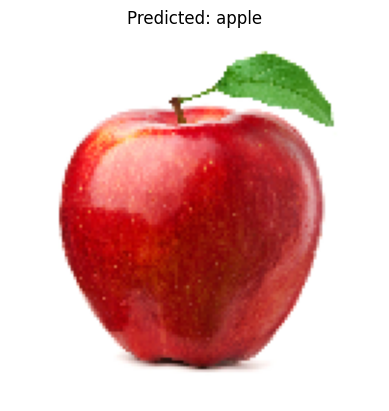

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


# Load and display the image
img = image.load_img(img_path, target_size=img_size)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()